# Waste Classification Using CNN Module

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib .pyplot
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


In [2]:
#pip install tensorflow

In [3]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_path = "dataset/TRAIN"
test_path = "dataset/TEST"

In [19]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization  
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from tensorflow.keras.utils import plot_model
from glob import glob

In [22]:
# Visualization
from cv2 import cvtColor
import cv2
import pandas as pd
from tqdm import tqdm
import glob
train_path = r"C:\Users\Raj\OneDrive\Desktop\Waste Classification\dataset\TRAIN"

x_data = []
y_data = []

for category in glob.glob(train_path + '/*'):
    for file in tqdm(glob.glob(category + '/*')):
        img_array = cv2.imread(file)
        if img_array is None:
            print(f"Error reading image: {file}")
            continue 
        img_array = cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('\\')[-1])  

data = pd.DataFrame({'image': x_data, 'label': y_data})
print("\nDataFrame head:")
print(data.head())

print(f"\nTotal images loaded: {len(x_data)}")
print(f"Total categories found: {len(set(y_data))}")
if len(x_data) == 0:
    print("No images loaded. Please check the dataset path.")

100%|██████████| 9999/9999 [01:31<00:00, 109.65it/s]



DataFrame head:
                                               image label
0  [[[255, 255, 255], [255, 255, 255], [255, 255,...     O
1  [[[241, 242, 247], [241, 242, 247], [241, 242,...     O
2  [[[224, 224, 224], [229, 229, 229], [236, 236,...     O
3  [[[255, 255, 255], [255, 255, 255], [255, 255,...     O
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...     O

Total images loaded: 22564
Total categories found: 2


In [23]:
data.shape

(22564, 2)

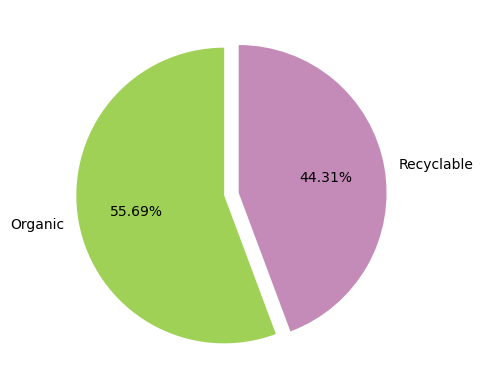

In [24]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%',
        colors=colors, startangle=90, explode=[0.05, 0.05])
plt.show()

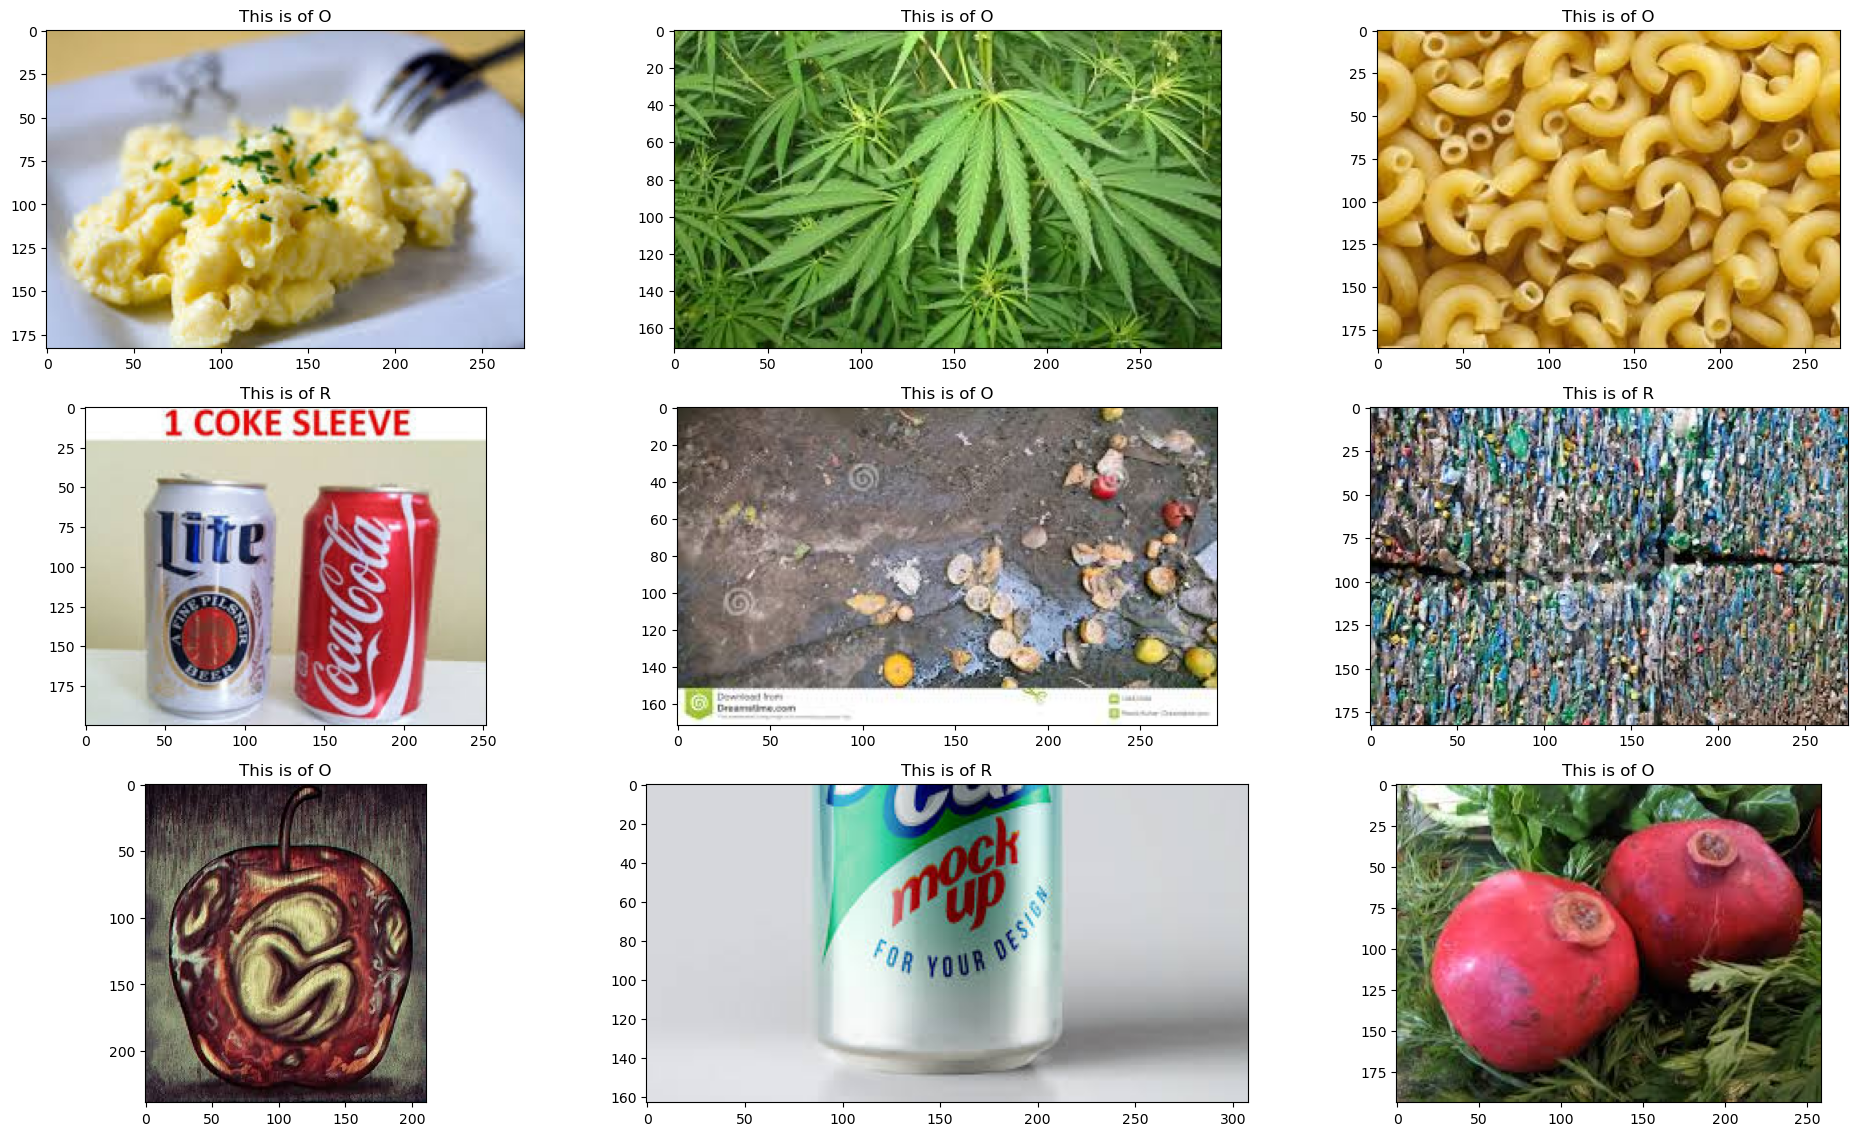

In [9]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()


# CNN - CONVOLUATION NEURAL NETWORK

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout

# Define the model
model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

# Second Convolutional Block
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

# Third Convolutional Block
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(2))
model.add(Activation('sigmoid'))

# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

batch_size = 256  # No changes



In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [29]:
train_path = train_datagen.flow_from_directory(
    train_path,
    target_size= (224,224),
    batch_size = batch_size,
    color_mode= "rgb",
    class_mode= "categorical"
)

test_path = test_datagen.flow_from_directory(
    test_path,
    target_size= (224,224),
    batch_size = batch_size,
    color_mode= "rgb",
    class_mode= "categorical"
)

Found 22564 images belonging to 2 classes.
Found 22564 images belonging to 2 classes.


In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ensure batch_size is defined before using it
batch_size = 32  # Set this to an appropriate value if not already defined

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define dataset paths (use absolute paths if needed)
train_path = r"C:\Users\Raj\OneDrive\Desktop\Waste Classification\dataset\TRAIN"
test_path = r"C:\Users\Raj\OneDrive\Desktop\Waste Classification\dataset\TEST"

# Check if dataset paths exist
import os
print("Train path exists:", os.path.exists(train_path))
print("Test path exists:", os.path.exists(test_path))

# Create train generator
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

# Create test generator
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

# Print to confirm
print("Train samples:", train_generator.samples)
print("Test samples:", test_generator.samples)


Train path exists: True
Test path exists: True
Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
Train samples: 22564
Test samples: 2513


In [36]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


Epoch 1/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 927s 1s/step - accuracy: 0.7777 - loss: 0.5214 - val_accuracy: 0.7788 - val_loss: 0.4817
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 844s 1s/step - accuracy: 0.8453 - loss: 0.3796 - val_accuracy: 0.8786 - val_loss: 0.3232
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 721s 1s/step - accuracy: 0.8712 - loss: 0.3355 - val_accuracy: 0.8790 - val_loss: 0.2887
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 622s 881ms/step - accuracy: 0.8752 - loss: 0.3122 - val_accuracy: 0.8794 - val_loss: 0.2969
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 632s 895ms/step - accuracy: 0.8981 - loss: 0.2684 - val_accuracy: 0.9033 - val_loss: 0.2689
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 649s 919ms/step - accuracy: 0.9222 - loss: 0.2060 - val_accuracy: 0.8826 - val_loss: 0.3613
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 650s 920ms/step - accuracy: 0.9379 - loss: 0.1686 - val_accuracy: 0.9089 - val_loss: 0.3159
Epoch 8/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 665s 941ms/step - accuracy: 0.9551 - loss: 0.